folders: 654

files in folder: 6972

total files: 4559688

target - additive ???

unique values = 5

    cGP       1059744
    hG        1031856
    cT         990024
    hM         885444
    hclear     592620
    Name: additive, dtype: int64

In [1]:
import utils
import server
import worker

import math
import tensorflow as tf
from tensorflow.python.client import device_lib


#print(device_lib.list_local_devices())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


LUPA-SGD

p - num of workers\
D - data size\
$\tau$ - number of local updates before synchronization\
$\eta_t$ - learning rate at t-iteration

F(x) - loss function is L-smooth and sutisfies PL-condition:\
$||\triangledown F(x) - \triangledown F(y)|| \leq L||x - y|| \\ \frac{1}{2}||\triangledown F(x)||_2^2 \geq \mu||F(x) - F(x^*)||$



$k = \frac{L}{\mu}\\
\alpha \geq O(max(\frac{1}{ln(\frac{D}{k^2}(\frac{k}{\tau}+D))};\frac{k}{\tau} + D))\\
a = \alpha \tau + 4\\
\eta_t = \frac{4}{\mu(t + a)}$

total_iterations: 2048.0
local updates: 35
rounds of comms: 59
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_8 (Rescaling)      (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 252, 252, 32)      832       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 250, 250, 32)      9248      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 83, 83, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 81, 81, 64)        18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 40, 40, 64)        0         
_________________________________________________________

Worker 1
Worker 2
RESULTS OF ROUND 32
10/10 - 0s - loss: nan - accuracy: 0.2400
Model, accuracy: 24.00%

Start of round 33
learning rate: 3.99655768892793e-05
Worker 0
Worker 1
Worker 2
RESULTS OF ROUND 33
10/10 - 0s - loss: nan - accuracy: 0.2400
Model, accuracy: 24.00%

Start of round 34
learning rate: 3.9965575491687936e-05
Worker 0
Worker 1
Worker 2
RESULTS OF ROUND 34
10/10 - 0s - loss: nan - accuracy: 0.2400
Model, accuracy: 24.00%

Start of round 35
learning rate: 3.996557409409666e-05
Worker 0
Worker 1
Worker 2
RESULTS OF ROUND 35
10/10 - 0s - loss: nan - accuracy: 0.2400
Model, accuracy: 24.00%

Start of round 36
learning rate: 3.996557269650548e-05
Worker 0
Worker 1
Worker 2
RESULTS OF ROUND 36
10/10 - 0s - loss: nan - accuracy: 0.2400
Model, accuracy: 24.00%

Start of round 37
learning rate: 3.9965571298914406e-05
Worker 0
Worker 1
Worker 2
RESULTS OF ROUND 37
10/10 - 0s - loss: nan - accuracy: 0.2400
Model, accuracy: 24.00%

Start of round 38
learning rate: 3.99655699013234

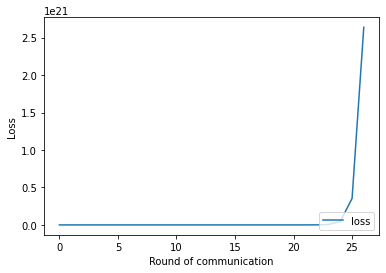

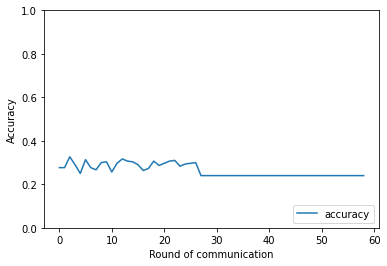

In [4]:
num_workers = 3
data_size = 24576
shard_size = 8192
minibatch_size = 32
epochs = 8
T = (shard_size / minibatch_size) * epochs
local_updates = int((T**(2/3))/((num_workers*minibatch_size)**(1/3)))
rounds = math.ceil(T / local_updates)


L = 100000
Mu = 0.0001
k = L/Mu #condition number
alpha = max(1/math.log(data_size/(k**2) * (k/local_updates + data_size)), k/local_updates + data_size)
a = alpha * local_updates + 4
#learning_rate = 0.0001
#regularization_rate = 0.0001

print("total_iterations:", T)
print("local updates:", local_updates)
print("rounds of comms:", rounds)

serv = server.Server(num_workers=num_workers,
                     shard_size=shard_size,
                     #learning_rate=learning_rate,
                     #regularization_rate=regularization_rate,
                     debug=True,
                     download=True)
serv.run(rounds=rounds,
         local_steps=local_updates,
         minibatch_size=minibatch_size, 
         Mu=Mu,
         a = a)

serv.plot_history()

In [5]:
model = utils.make_model()
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_12 (Rescaling)     (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 252, 252, 32)      832       
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 250, 250, 32)      9248      
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 83, 83, 32)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 81, 81, 64)        18496     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 40, 40, 64)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 38, 38, 64)      